### Hot encoding of features 

In [2]:
import os
import pandas as pd
#os.chdir('C:\\Users\\Brook\\Desktop\\#SMU_Courses\\#MSDS 6130 Capstone A & B\\MSDS6120 CapstoneA\\#ProjectData&NoteBook')

In [3]:
# To get an unbiased performance estimate, the test data must not be used in any way to make choices 
# about the model, including feature selection.

# https://stats.stackexchange.com/questions/64825/should-feature-selection-be-performed-only-on-training-data-or-all-data

In [4]:
dfTrain = pd.read_csv(r'UNSW_NB15_training_set.csv')
dfTest = pd.read_csv(r'UNSW_NB15_testing_set.csv')

list_events = pd.read_csv(r'UNSW_NB15_LIST_EVENTS.csv')
features = pd.read_csv(r'UNSW_NB15_features.csv',encoding='latin1')

In [5]:
#dfTrain = pd.read_csv('G:/SMU Data Science/SMU Courses/DS 6120 Capstone A/UNSW-NB15 Data Set/UNSW_NB15_training-set.csv')
#dfTest = pd.read_csv('G:/SMU Data Science/SMU Courses/DS 6120 Capstone A/UNSW-NB15 Data Set/UNSW_NB15_testing-set.csv')
#list_events = pd.read_csv("G:/SMU Data Science/SMU Courses/DS 6120 Capstone A/UNSW-NB15 Data Set/UNSW-NB15_LIST_EVENTS.csv")
#features = pd.read_csv("G:/SMU Data Science/SMU Courses/DS 6120 Capstone A/UNSW-NB15 Data Set/NUSW-NB15_features.csv",encoding='latin1')


In [6]:
dfTrain.shape

(175341, 45)

In [8]:
dfTrain.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [7]:
#Display all the coloumns setting 
pd.set_option('display.max_columns', None)
dfTrain.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [4]:
#Check missing values 
dfTrain.isnull().values.any()

False

In [5]:
# identify object coloumns /catagory varriables in the data set 
obj_dfTrain = dfTrain.select_dtypes(include=['object']).copy()
obj_dfTrain.head()

,proto,service,state,attack_cat
0,tcp,-,FIN,Normal
1,tcp,-,FIN,Normal
2,tcp,-,FIN,Normal
3,tcp,ftp,FIN,Normal
4,tcp,-,FIN,Normal


In [6]:
List_Of_Categories_In_Column=list(dfTrain['attack_cat'].value_counts().index)
List_Of_Categories_In_Column


['Normal',
 'Generic',
 'Exploits',
 'Fuzzers',
 'DoS',
 'Reconnaissance',
 'Analysis',
 'Backdoor',
 'Shellcode',
 'Worms']

In [7]:
len(List_Of_Categories_In_Column)

10

In [8]:
List_Of_Categories_In_Column=list(dfTrain['state'].value_counts().index)
List_Of_Categories_In_Column
#len(List_Of_Categories_In_Column)

['INT', 'FIN', 'CON', 'REQ', 'RST', 'ECO', 'URN', 'PAR', 'no']

In [11]:
List_Of_Categories_In_Column=list(dfTrain['proto'].value_counts().index)
List_Of_Categories_In_Column
len(List_Of_Categories_In_Column)

133

In [9]:
# 13 catagories in service 
List_Of_Categories_In_Column=list(dfTrain['service'].value_counts().index)
List_Of_Categories_In_Column
#len(List_Of_Categories_In_Column)

['-',
 'dns',
 'http',
 'smtp',
 'ftp-data',
 'ftp',
 'ssh',
 'pop3',
 'dhcp',
 'snmp',
 'ssl',
 'irc',
 'radius']

In [11]:
# using hot encoding we are going to introduce 165 coloumns labeled 1 and 0 to our data set 
# https://pbpython.com/categorical-encoding.html

In [12]:
# Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric 
# values can be “misinterpreted” by the algorithms. For example, the value of 0 is obviously less than the value of 
# 4 but does that really correspond to the data set in real life? Does a wagon have “4X” more weight in our calculation 
# than the convertible? In this example, I don’t think so.
# A common alternative approach is called one hot encoding (but also goes by several different names shown below). 
# Despite the different names, the basic strategy is to convert each category value into a new column and assigns a 
# 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the
# downside of adding more columns to the data set.

## Label encoding 

In [166]:
##its done on a separate notebook 

## Hot encoding 

In [13]:

pd.get_dummies(obj_dfTrain, columns=["state"], prefix=["stateCat"]).head()

,proto,service,attack_cat,stateCat_CON,stateCat_ECO,stateCat_FIN,stateCat_INT,stateCat_PAR,stateCat_REQ,stateCat_RST,stateCat_URN,stateCat_no
0,tcp,-,Normal,0,0,1,0,0,0,0,0,0
1,tcp,-,Normal,0,0,1,0,0,0,0,0,0
2,tcp,-,Normal,0,0,1,0,0,0,0,0,0
3,tcp,ftp,Normal,0,0,1,0,0,0,0,0,0
4,tcp,-,Normal,0,0,1,0,0,0,0,0,0


In [14]:
# Hot encoding using get_dummies including attack_cat
# if we need to remove attack_cat for packet model approach , 
# we need to remove attack_cat varriable from hot encoding here 

encoded_features=pd.get_dummies(obj_dfTrain, columns=["state", "proto","service","attack_cat"], prefix=["stateCat", "ProtoCat", "serviceCat","attackCat"]).head()
encoded_features.describe()

,stateCat_CON,stateCat_ECO,stateCat_FIN,stateCat_INT,stateCat_PAR,stateCat_REQ,stateCat_RST,stateCat_URN,stateCat_no,ProtoCat_3pc,...,attackCat_Analysis,attackCat_Backdoor,attackCat_DoS,attackCat_Exploits,attackCat_Fuzzers,attackCat_Generic,attackCat_Normal,attackCat_Reconnaissance,attackCat_Shellcode,attackCat_Worms
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
max,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
encoded_features.shape

(5, 165)

In [120]:
list(encoded_features.attackCat_Normal.values)

[1, 1, 1, 1, 1]

In [121]:
list(encoded_features.attackCat_Backdoor.values)

[0, 0, 0, 0, 0]

In [16]:
# concatenate the encoded features with the main dataframe 
dfTrain2=pd.concat([dfTrain,encoded_features],axis=1)
dfTrain2.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,attackCat_Analysis,attackCat_Backdoor,attackCat_DoS,attackCat_Exploits,attackCat_Fuzzers,attackCat_Generic,attackCat_Normal,attackCat_Reconnaissance,attackCat_Shellcode,attackCat_Worms
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
#Display all the coloumns setting 
pd.set_option('display.max_columns', None)
dfTrain2.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,stateCat_CON,stateCat_ECO,stateCat_FIN,stateCat_INT,stateCat_PAR,stateCat_REQ,stateCat_RST,stateCat_URN,stateCat_no,ProtoCat_3pc,ProtoCat_a/n,ProtoCat_aes-sp3-d,ProtoCat_any,ProtoCat_argus,ProtoCat_aris,ProtoCat_arp,ProtoCat_ax.25,ProtoCat_bbn-rcc,ProtoCat_bna,ProtoCat_br-sat-mon,ProtoCat_cbt,ProtoCat_cftp,ProtoCat_chaos,ProtoCat_compaq-peer,ProtoCat_cphb,ProtoCat_cpnx,ProtoCat_crtp,ProtoCat_crudp,ProtoCat_dcn,ProtoCat_ddp,ProtoCat_ddx,ProtoCat_dgp,ProtoCat_egp,ProtoCat_eigrp,ProtoCat_emcon,ProtoCat_encap,ProtoCat_etherip,ProtoCat_fc,ProtoCat_fire,ProtoCat_ggp,ProtoCat_gmtp,ProtoCat_gre,ProtoCat_hmp,ProtoCat_i-nlsp,ProtoCat_iatp,ProtoCat_ib,ProtoCat_icmp,ProtoCat_idpr,ProtoCat_idpr-cmtp,ProtoCat_idrp,ProtoCat_ifmp,ProtoCat_igmp,ProtoCat_igp,ProtoCat_il,ProtoCat_ip,ProtoCat_ipcomp,ProtoCat_ipcv,ProtoCat_ipip,ProtoCat_iplt,ProtoCat_ipnip,ProtoCat_ippc,ProtoCat_ipv6,ProtoCat_ipv6-frag,ProtoCat_ipv6-no,ProtoCat_ipv6-opts,ProtoCat_ipv6-route,ProtoCat_ipx-n-ip,ProtoCat_irtp,ProtoCat_isis,ProtoCat_iso-ip,ProtoCat_iso-tp4,ProtoCat_kryptolan,ProtoCat_l2tp,ProtoCat_larp,ProtoCat_leaf-1,ProtoCat_leaf-2,ProtoCat_merit-inp,ProtoCat_mfe-nsp,ProtoCat_mhrp,ProtoCat_micp,ProtoCat_mobile,ProtoCat_mtp,ProtoCat_mux,ProtoCat_narp,ProtoCat_netblt,ProtoCat_nsfnet-igp,ProtoCat_nvp,ProtoCat_ospf,ProtoCat_pgm,ProtoCat_pim,ProtoCat_pipe,ProtoCat_pnni,ProtoCat_pri-enc,ProtoCat_prm,ProtoCat_ptp,ProtoCat_pup,ProtoCat_pvp,ProtoCat_qnx,ProtoCat_rdp,ProtoCat_rsvp,ProtoCat_rtp,ProtoCat_rvd,ProtoCat_sat-expak,ProtoCat_sat-mon,ProtoCat_sccopmce,ProtoCat_scps,ProtoCat_sctp,ProtoCat_sdrp,ProtoCat_secure-vmtp,ProtoCat_sep,ProtoCat_skip,ProtoCat_sm,ProtoCat_smp,ProtoCat_snp,ProtoCat_sprite-rpc,ProtoCat_sps,ProtoCat_srp,ProtoCat_st2,ProtoCat_stp,ProtoCat_sun-nd,ProtoCat_swipe,ProtoCat_tcf,ProtoCat_tcp,ProtoCat_tlsp,ProtoCat_tp++,ProtoCat_trunk-1,ProtoCat_trunk-2,ProtoCat_ttp,ProtoCat_udp,ProtoCat_unas,ProtoCat_uti,ProtoCat_vines,ProtoCat_visa,ProtoCat_vmtp,ProtoCat_vrrp,ProtoCat_wb-expak,ProtoCat_wb-mon,ProtoCat_wsn,ProtoCat_xnet,ProtoCat_xns-idp,ProtoCat_xtp,ProtoCat_zero,serviceCat_-,serviceCat_dhcp,serviceCat_dns,serviceCat_ftp,serviceCat_ftp-data,serviceCat_http,serviceCat_irc,serviceCat_pop3,serviceCat_radius,serviceCat_smtp,serviceCat_snmp,serviceCat_ssh,serviceCat_ssl,attackCat_Analysis,attackCat_Backdoor,attackCat_DoS,attackCat_Exploits,attackCat_Fuzzers,attackCat_Generic,attackCat_Normal,attackCat_Reconnaissance,attackCat_Shellcode,attackCat_Worms
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [18]:
dfTrain2.shape

(175341, 210)

In [19]:
# we dropped the catagorical varriables 
dfTrain3 = dfTrain2.drop(['id','attack_cat','proto','service', 'state'], axis = 1)

In [20]:
dfTrain3.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,stateCat_CON,stateCat_ECO,stateCat_FIN,stateCat_INT,stateCat_PAR,stateCat_REQ,stateCat_RST,stateCat_URN,stateCat_no,ProtoCat_3pc,ProtoCat_a/n,ProtoCat_aes-sp3-d,ProtoCat_any,ProtoCat_argus,ProtoCat_aris,ProtoCat_arp,ProtoCat_ax.25,ProtoCat_bbn-rcc,ProtoCat_bna,ProtoCat_br-sat-mon,ProtoCat_cbt,ProtoCat_cftp,ProtoCat_chaos,ProtoCat_compaq-peer,ProtoCat_cphb,ProtoCat_cpnx,ProtoCat_crtp,ProtoCat_crudp,ProtoCat_dcn,ProtoCat_ddp,ProtoCat_ddx,ProtoCat_dgp,ProtoCat_egp,ProtoCat_eigrp,ProtoCat_emcon,ProtoCat_encap,ProtoCat_etherip,ProtoCat_fc,ProtoCat_fire,ProtoCat_ggp,ProtoCat_gmtp,ProtoCat_gre,ProtoCat_hmp,ProtoCat_i-nlsp,ProtoCat_iatp,ProtoCat_ib,ProtoCat_icmp,ProtoCat_idpr,ProtoCat_idpr-cmtp,ProtoCat_idrp,ProtoCat_ifmp,ProtoCat_igmp,ProtoCat_igp,ProtoCat_il,ProtoCat_ip,ProtoCat_ipcomp,ProtoCat_ipcv,ProtoCat_ipip,ProtoCat_iplt,ProtoCat_ipnip,ProtoCat_ippc,ProtoCat_ipv6,ProtoCat_ipv6-frag,ProtoCat_ipv6-no,ProtoCat_ipv6-opts,ProtoCat_ipv6-route,ProtoCat_ipx-n-ip,ProtoCat_irtp,ProtoCat_isis,ProtoCat_iso-ip,ProtoCat_iso-tp4,ProtoCat_kryptolan,ProtoCat_l2tp,ProtoCat_larp,ProtoCat_leaf-1,ProtoCat_leaf-2,ProtoCat_merit-inp,ProtoCat_mfe-nsp,ProtoCat_mhrp,ProtoCat_micp,ProtoCat_mobile,ProtoCat_mtp,ProtoCat_mux,ProtoCat_narp,ProtoCat_netblt,ProtoCat_nsfnet-igp,ProtoCat_nvp,ProtoCat_ospf,ProtoCat_pgm,ProtoCat_pim,ProtoCat_pipe,ProtoCat_pnni,ProtoCat_pri-enc,ProtoCat_prm,ProtoCat_ptp,ProtoCat_pup,ProtoCat_pvp,ProtoCat_qnx,ProtoCat_rdp,ProtoCat_rsvp,ProtoCat_rtp,ProtoCat_rvd,ProtoCat_sat-expak,ProtoCat_sat-mon,ProtoCat_sccopmce,ProtoCat_scps,ProtoCat_sctp,ProtoCat_sdrp,ProtoCat_secure-vmtp,ProtoCat_sep,ProtoCat_skip,ProtoCat_sm,ProtoCat_smp,ProtoCat_snp,ProtoCat_sprite-rpc,ProtoCat_sps,ProtoCat_srp,ProtoCat_st2,ProtoCat_stp,ProtoCat_sun-nd,ProtoCat_swipe,ProtoCat_tcf,ProtoCat_tcp,ProtoCat_tlsp,ProtoCat_tp++,ProtoCat_trunk-1,ProtoCat_trunk-2,ProtoCat_ttp,ProtoCat_udp,ProtoCat_unas,ProtoCat_uti,ProtoCat_vines,ProtoCat_visa,ProtoCat_vmtp,ProtoCat_vrrp,ProtoCat_wb-expak,ProtoCat_wb-mon,ProtoCat_wsn,ProtoCat_xnet,ProtoCat_xns-idp,ProtoCat_xtp,ProtoCat_zero,serviceCat_-,serviceCat_dhcp,serviceCat_dns,serviceCat_ftp,serviceCat_ftp-data,serviceCat_http,serviceCat_irc,serviceCat_pop3,serviceCat_radius,serviceCat_smtp,serviceCat_snmp,serviceCat_ssh,serviceCat_ssl,attackCat_Analysis,attackCat_Backdoor,attackCat_DoS,attackCat_Exploits,attackCat_Fuzzers,attackCat_Generic,attackCat_Normal,attackCat_Reconnaissance,attackCat_Shellcode,attackCat_Worms
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,5.0,5.0,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5

In [21]:
dfTrain3.shape

(175341, 205)

In [22]:
#Find the index of specific coloumn, our target varriable 
dfTrain3.columns.get_loc("label")

39

In [23]:
# identify object coloumns /catagory varriables in the data set 
#obj_dfTrain3 = dfTrain3.select_dtypes(include=['object']).copy()
#obj_dfTrain3.head()

In [24]:
len(dfTrain3.columns)

205

In [25]:
pd.set_option('display.max_columns', None)
dfTrain3.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,stateCat_CON,stateCat_ECO,stateCat_FIN,stateCat_INT,stateCat_PAR,stateCat_REQ,stateCat_RST,stateCat_URN,stateCat_no,ProtoCat_3pc,ProtoCat_a/n,ProtoCat_aes-sp3-d,ProtoCat_any,ProtoCat_argus,ProtoCat_aris,ProtoCat_arp,ProtoCat_ax.25,ProtoCat_bbn-rcc,ProtoCat_bna,ProtoCat_br-sat-mon,ProtoCat_cbt,ProtoCat_cftp,ProtoCat_chaos,ProtoCat_compaq-peer,ProtoCat_cphb,ProtoCat_cpnx,ProtoCat_crtp,ProtoCat_crudp,ProtoCat_dcn,ProtoCat_ddp,ProtoCat_ddx,ProtoCat_dgp,ProtoCat_egp,ProtoCat_eigrp,ProtoCat_emcon,ProtoCat_encap,ProtoCat_etherip,ProtoCat_fc,ProtoCat_fire,ProtoCat_ggp,ProtoCat_gmtp,ProtoCat_gre,ProtoCat_hmp,ProtoCat_i-nlsp,ProtoCat_iatp,ProtoCat_ib,ProtoCat_icmp,ProtoCat_idpr,ProtoCat_idpr-cmtp,ProtoCat_idrp,ProtoCat_ifmp,ProtoCat_igmp,ProtoCat_igp,ProtoCat_il,ProtoCat_ip,ProtoCat_ipcomp,ProtoCat_ipcv,ProtoCat_ipip,ProtoCat_iplt,ProtoCat_ipnip,ProtoCat_ippc,ProtoCat_ipv6,ProtoCat_ipv6-frag,ProtoCat_ipv6-no,ProtoCat_ipv6-opts,ProtoCat_ipv6-route,ProtoCat_ipx-n-ip,ProtoCat_irtp,ProtoCat_isis,ProtoCat_iso-ip,ProtoCat_iso-tp4,ProtoCat_kryptolan,ProtoCat_l2tp,ProtoCat_larp,ProtoCat_leaf-1,ProtoCat_leaf-2,ProtoCat_merit-inp,ProtoCat_mfe-nsp,ProtoCat_mhrp,ProtoCat_micp,ProtoCat_mobile,ProtoCat_mtp,ProtoCat_mux,ProtoCat_narp,ProtoCat_netblt,ProtoCat_nsfnet-igp,ProtoCat_nvp,ProtoCat_ospf,ProtoCat_pgm,ProtoCat_pim,ProtoCat_pipe,ProtoCat_pnni,ProtoCat_pri-enc,ProtoCat_prm,ProtoCat_ptp,ProtoCat_pup,ProtoCat_pvp,ProtoCat_qnx,ProtoCat_rdp,ProtoCat_rsvp,ProtoCat_rtp,ProtoCat_rvd,ProtoCat_sat-expak,ProtoCat_sat-mon,ProtoCat_sccopmce,ProtoCat_scps,ProtoCat_sctp,ProtoCat_sdrp,ProtoCat_secure-vmtp,ProtoCat_sep,ProtoCat_skip,ProtoCat_sm,ProtoCat_smp,ProtoCat_snp,ProtoCat_sprite-rpc,ProtoCat_sps,ProtoCat_srp,ProtoCat_st2,ProtoCat_stp,ProtoCat_sun-nd,ProtoCat_swipe,ProtoCat_tcf,ProtoCat_tcp,ProtoCat_tlsp,ProtoCat_tp++,ProtoCat_trunk-1,ProtoCat_trunk-2,ProtoCat_ttp,ProtoCat_udp,ProtoCat_unas,ProtoCat_uti,ProtoCat_vines,ProtoCat_visa,ProtoCat_vmtp,ProtoCat_vrrp,ProtoCat_wb-expak,ProtoCat_wb-mon,ProtoCat_wsn,ProtoCat_xnet,ProtoCat_xns-idp,ProtoCat_xtp,ProtoCat_zero,serviceCat_-,serviceCat_dhcp,serviceCat_dns,serviceCat_ftp,serviceCat_ftp-data,serviceCat_http,serviceCat_irc,serviceCat_pop3,serviceCat_radius,serviceCat_smtp,serviceCat_snmp,serviceCat_ssh,serviceCat_ssl,attackCat_Analysis,attackCat_Backdoor,attackCat_DoS,attackCat_Exploits,attackCat_Fuzzers,attackCat_Generic,attackCat_Normal,attackCat_Reconnaissance,attackCat_Shellcode,attackCat_Worms
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [26]:
dfTrain3.shape

(175341, 205)

In [27]:
dfTrain3.columns[1:]

Index(['spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload',
       'dload', 'sloss',
       ...
       'attackCat_Analysis', 'attackCat_Backdoor', 'attackCat_DoS',
       'attackCat_Exploits', 'attackCat_Fuzzers', 'attackCat_Generic',
       'attackCat_Normal', 'attackCat_Reconnaissance', 'attackCat_Shellcode',
       'attackCat_Worms'],
      dtype='object', length=204)

In [ ]:
# for flow based approach we dont need attack category  , attack_cat coloumn should be dropped 

# for packet based approach we need attack category 

## DJ classification 

In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.s plt

## Random forest classifier for feature selection

### 1. Random forest classifier with boolean scoring method 

In [42]:
#Check missing values 
dfTrain.isnull().values.any()

False

In [41]:
#Check missing values 
dfTrain2.isnull().values.any()

True

In [40]:
#Check missing values 
dfTrain3.isnull().values.any()

True

In [44]:
select = SelectFromModel(RandomForestClassifier(n_estimators = 300))

In [45]:

X=dfTrain3.loc[:, dfTrain3.columns != 'label']

In [46]:
X.shape

(175341, 204)

In [47]:
X.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload',
       ...
       'attackCat_Analysis', 'attackCat_Backdoor', 'attackCat_DoS',
       'attackCat_Exploits', 'attackCat_Fuzzers', 'attackCat_Generic',
       'attackCat_Normal', 'attackCat_Reconnaissance', 'attackCat_Shellcode',
       'attackCat_Worms'],
      dtype='object', length=204)

In [48]:
# be very careful of index value if you drop any varriable in the data frame 
y = dfTrain3.iloc[:,39]

In [49]:
y

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64

In [50]:
# To adress error we have got  during fitting step for RF selection we used the following code replace na
# https://datascience.stackexchange.com/questions/11928/valueerror-input-contains-nan-infinity-or-
# a-value-too-large-for-dtypefloat32

pd.set_option('display.max_columns', None)
#X.fillna(X.mean())

https://datascience.stackexchange.com/questions/11928/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat32

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

In [53]:
# We get an error during fitting that says , ValueError: Input contains NaN, infinity or 
# a value too large for dtype('float32')

X.fillna(y.mean(), inplace=True)

C:\Users\Brook\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [54]:
y = y.fillna(X.mean())

In [55]:
X.shape

(175341, 204)

In [56]:
select.fit(X,y)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=300, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [57]:
select.transform(X) # Transforming the data into an Array

array([[1.214780e-01, 6.000000e+00, 4.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       [6.499020e-01, 1.400000e+01, 3.800000e+01, ..., 1.000000e+00,
        6.000000e+00, 0.000000e+00],
       [1.623129e+00, 8.000000e+00, 1.600000e+01, ..., 2.000000e+00,
        6.000000e+00, 0.000000e+00],
       ...,
       [9.000000e-06, 2.000000e+00, 0.000000e+00, ..., 3.000000e+00,
        1.200000e+01, 0.000000e+00],
       [9.000000e-06, 2.000000e+00, 0.000000e+00, ..., 3.000000e+01,
        3.000000e+01, 0.000000e+00],
       [9.000000e-06, 2.000000e+00, 0.000000e+00, ..., 3.000000e+01,
        3.000000e+01, 0.000000e+00]])

In [45]:
# To see which features are important we can use get_support method on the fitted model.
#It will return an array of boolean values. True for the features whose importance is greater than the mean 
#importance and False for the rest.
# https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [58]:
len(select.get_support())

204

In [59]:
# steps to attach boolean value with corresponding variables 
X.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload',
       ...
       'attackCat_Analysis', 'attackCat_Backdoor', 'attackCat_DoS',
       'attackCat_Exploits', 'attackCat_Fuzzers', 'attackCat_Generic',
       'attackCat_Normal', 'attackCat_Reconnaissance', 'attackCat_Shellcode',
       'attackCat_Worms'],
      dtype='object', length=204)

In [60]:
list1 = list(select.get_support())

In [86]:
#list1

In [62]:
df_feat_imp = pd.DataFrame({"Feature_Name":X.columns, "Importance": list1})

In [87]:
pd.set_option('display.max_rows', None)
df_feat_imp

In [88]:
pd.set_option('display.max_rows', None)
df_feat_imp.sort_values(["Importance"],ascending = False)


In [75]:
df=df_feat_imp

In [85]:
DfModelSelection1=df.loc[df['Importance'] == True]
DfModelSelection1

,Feature_Name,Importance
0,dur,True
1,spkts,True
2,dpkts,True
3,sbytes,True
4,dbytes,True
5,rate,True
6,sttl,True
7,dttl,True
8,sload,True
9,dload,True


## Second Method

## 2 Random forest classfier with non boolean scoring method 

In [89]:
rfc = RandomForestClassifier()
rfc.fit(X,y)

C:\Users\Brook\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
rfc.feature_importances_

array([4.40906307e-02, 1.84007209e-02, 2.74922922e-02, 2.52907244e-02,
       1.32885602e-02, 7.88213115e-02, 2.28414200e-01, 7.38855438e-02,
       7.35847326e-02, 1.54594587e-02, 1.05264378e-02, 3.14136505e-03,
       1.44905676e-02, 1.03062542e-02, 1.06433904e-02, 1.07030483e-02,
       3.85467741e-03, 8.68270643e-03, 8.43838299e-03, 3.35458425e-05,
       3.71123833e-02, 1.98424279e-02, 4.22896385e-02, 3.58072378e-02,
       7.33775838e-03, 9.66436378e-04, 1.38282458e-03, 3.13231229e-02,
       5.62088702e-02, 8.95842885e-03, 5.40897341e-03, 4.36534814e-03,
       2.42733030e-02, 7.21803574e-05, 1.79874020e-04, 5.09643935e-03,
       1.62407519e-02, 2.31292407e-02, 3.80439479e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.52261474e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [97]:
len(select.get_support())

204

In [98]:
list2 = list(select.get_support())
#list2

In [106]:
df_feat_imp2 = pd.DataFrame({"Feature_Name":X.columns, "Importance": list(rfc.feature_importances_)})
#df_feat_imp2.sort_values(["Importance"],ascending = False)

In [132]:
df_feat_imp2.head(5)

,Feature_Name,Importance
0,dur,0.044091
1,spkts,0.018401
2,dpkts,0.027492
3,sbytes,0.025291
4,dbytes,0.013289


In [230]:
# R code to python 
#pip install rpy2

In [229]:
# python interface to r 
#pip install PypeR

In [143]:
import platform
platform.architecture()

('64bit', 'WindowsPE')

In [148]:
# OSError: cannot load library 'C:\Program Files\R\R-3.5.0\bin\x64\R.dll': error 0x7e 
#when i run 'from rpy2.robjects import r'

#import rpy2 
#from rpy2 import rinterface

In [149]:
#from rpy2.robjects import r

In [ ]:
# ggplotRegression = r("""
# require(ggplot2)
# plot(df_feat_imp2, cex.axis=.7, las=2, xlab="", main="Variable Importance") """)

In [100]:
df_feat_imp2 =df

In [103]:
# we chnage the eulers number ( natural number) to float to identify important values
df['Importance'] = df['Importance'].astype('float')

In [131]:
DfModelSelection2=df.loc[df['Importance'] == 1]
DfModelSelection2

,Feature_Name,Importance
0,dur,True
1,spkts,True
2,dpkts,True
3,sbytes,True
4,dbytes,True
5,rate,True
6,sttl,True
7,dttl,True
8,sload,True
9,dload,True


In [58]:
rfc.feature_importances_.sum()

1.0

## Third Method of feature Selection

### Method Baruta using a wrapper on the random forest method with iterations

In [108]:
X = np.array(X) # Converting the data into an array for Baruta, X was a data frame
y = np.array(y)

In [109]:
X

array([[1.2147800e-01, 6.0000000e+00, 4.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.4990200e-01, 1.4000000e+01, 3.8000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6231290e+00, 8.0000000e+00, 1.6000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [9.0000000e-06, 2.0000000e+00, 0.0000000e+00, ..., 6.8062233e-01,
        6.8062233e-01, 6.8062233e-01],
       [9.0000000e-06, 2.0000000e+00, 0.0000000e+00, ..., 6.8062233e-01,
        6.8062233e-01, 6.8062233e-01],
       [9.0000000e-06, 2.0000000e+00, 0.0000000e+00, ..., 6.8062233e-01,
        6.8062233e-01, 6.8062233e-01]])

In [110]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [116]:
#  pip install Boruta or 
#  conda install -c conda-forge boruta_py  
#  https://datascience.stackexchange.com/questions/60220/how-to-install-boruta-in-conda
from boruta import BorutaPy

In [117]:
rf = RandomForestClassifier()

In [118]:
boruta_feature_selector = BorutaPy(rf, random_state = 111, max_iter = 10, perc = 100 , verbose =2)

In [122]:
# Takes more time , hour glass code , enhance memory 
boruta_feature_selector.fit(X , y)

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	204
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	204
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	204
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	204
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	204
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	204
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	204
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	33
Tentative: 	1
Rejected: 	170
Iteration: 	9 / 10
Confirmed: 	33
Tentative: 	1
Rejected: 	170


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	33
Tentative: 	0
Rejected: 	170


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                          criterion='gini', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=1000, n_jobs=None,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x000002733263D278>,
                                          verbose=0, warm_start=False),
         max_iter=10, n_estimators=1000, perc=100,
     

In [123]:
boruta_feature_selector.support_


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [124]:
len(boruta_feature_selector.support_)

204

In [125]:
X=dfTrain3.loc[:, dfTrain3.columns != 'label']

In [126]:
df_feat_imp3 = pd.DataFrame({"Feature_Name":X.columns, "Importance": list(boruta_feature_selector.support_)})

In [127]:
df_feat_imp3.sort_values(["Importance"],ascending = False)

,Feature_Name,Importance
0,dur,True
28,ct_state_ttl,True
20,tcprtt,True
21,synack,True
22,ackdat,True
23,smean,True
24,dmean,True
27,ct_srv_src,True
29,ct_dst_ltm,True
17,stcpb,True


In [128]:
df=df_feat_imp3

In [130]:
DfModelSelection3=df.loc[df['Importance'] == True]
DfModelSelection3

,Feature_Name,Importance
0,dur,True
1,spkts,True
2,dpkts,True
3,sbytes,True
4,dbytes,True
5,rate,True
6,sttl,True
7,dttl,True
8,sload,True
9,dload,True


In [ ]:
#plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance") 

## covarriance matrix 

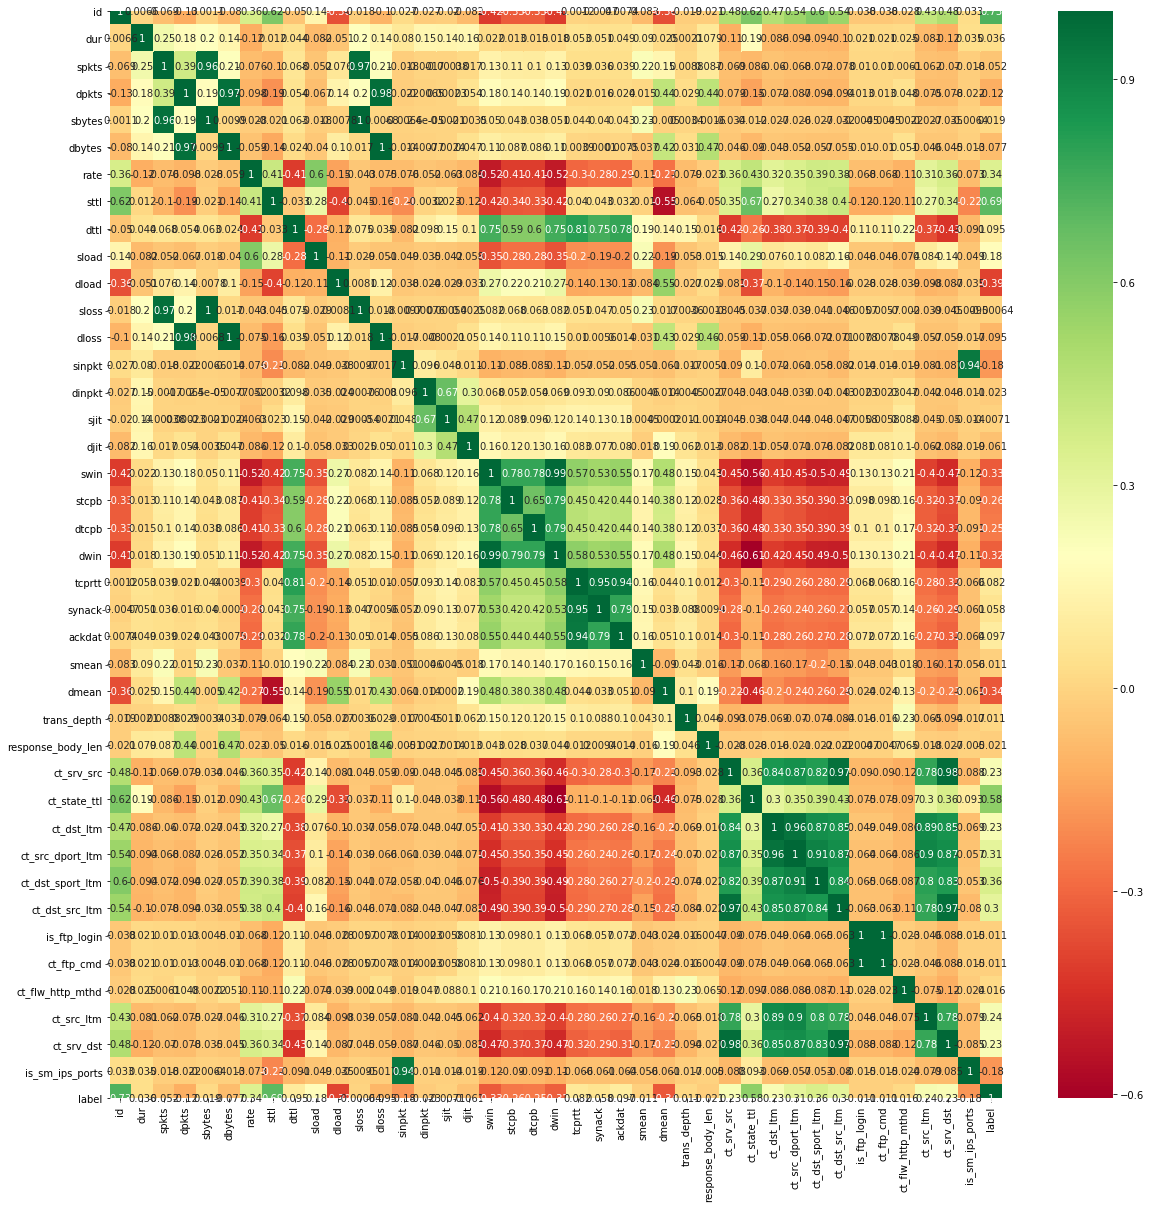

In [153]:
#get correlations of each features in dataset
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = dfTrain.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dfTrain2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [164]:
import numpy as np

# Create correlation matrix
corr_matrix = dfTrain.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop
# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

['sbytes',
 'dbytes',
 'sloss',
 'dloss',
 'dwin',
 'synack',
 'ackdat',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_ftp_cmd',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [165]:
DfModelSelection3=df.loc[df['Importance'] == True]
DfModelSelection3

,Feature_Name,Importance
0,dur,True
1,spkts,True
2,dpkts,True
3,sbytes,True
4,dbytes,True
5,rate,True
6,sttl,True
7,dttl,True
8,sload,True
9,dload,True


In [170]:
# codes to be removed based on covariance matrix 

# 'sbytes',
#  'dbytes',   
#  'sloss',
#  'dloss',
# 'synack',
# 'ackdat',
# 'ct_src_dport_ltm',
# 'ct_dst_sport_ltm',
# 'ct_srv_dst'
# 'is_sm_ips_ports'
    
#  ]

In [173]:
# reset index 
DfModelSelection3= DfModelSelection3.reset_index(drop=True)
DfModelSelection3

,Feature_Name,Importance
0,dur,True
1,spkts,True
2,dpkts,True
3,sbytes,True
4,dbytes,True
5,rate,True
6,sttl,True
7,dttl,True
8,sload,True
9,dload,True


In [175]:
FinalDataFrameHotEncoding = DfModelSelection3.drop(DfModelSelection3.index[[3,4,10,11,20,21,27,28,31,32]])
FinalDataFrameHotEncoding

,Feature_Name,Importance
0,dur,True
1,spkts,True
2,dpkts,True
5,rate,True
6,sttl,True
7,dttl,True
8,sload,True
9,dload,True
12,sinpkt,True
13,dinpkt,True


In [176]:
FinalDataFrameHotEncoding= FinalDataFrameHotEncoding.reset_index(drop=True)
FinalDataFrameHotEncoding

,Feature_Name,Importance
0,dur,True
1,spkts,True
2,dpkts,True
3,rate,True
4,sttl,True
5,dttl,True
6,sload,True
7,dload,True
8,sinpkt,True
9,dinpkt,True


In [193]:
#list(FinalDataFrameHotEncoding.columns.values)
dfTest=FinalDataFrameHotEncoding.loc[:,FinalDataFrameHotEncoding.columns.values =='Feature_Name' ]
dfTest

,Feature_Name
0,dur
1,spkts
2,dpkts
3,rate
4,sttl
5,dttl
6,sload
7,dload
8,sinpkt
9,dinpkt


In [177]:
dfTrain.shape

(175341, 45)

In [179]:
dfTrain.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [212]:
FinalDataFrameHotEncodings_Flow=dfTrain[[
'id' ,
'dur',                         
'spkts', 
'dpkts', 
'rate', 
'sttl', 
'dttl', 
'sload', 
'dload', 
'sinpkt', 
'dinpkt', 
'sjit', 
'djit', 
'swin', 
'stcpb', 
'dtcpb', 
'tcprtt', 
'smean', 
'dmean', 
'ct_srv_src', 
'ct_state_ttl', 
'ct_dst_ltm', 
'ct_dst_src_ltm', 
'ct_src_ltm',
'label']]

In [219]:
FinalDataFrameHotEncodings_Packet=dfTrain[[
'id' ,
'dur',                         
'spkts', 
'dpkts', 
'rate', 
'sttl', 
'dttl', 
'sload', 
'dload', 
'sinpkt', 
'dinpkt', 
'sjit', 
'djit', 
'swin', 
'stcpb', 
'dtcpb', 
'tcprtt', 
'smean', 
'dmean', 
'ct_srv_src', 
'ct_state_ttl', 
'ct_dst_ltm', 
'ct_dst_src_ltm', 
'ct_src_ltm',
'attack_cat'
]]

In [220]:
FinalDataFrameHotEncodings_Flow.head()

,id,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,tcprtt,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_src_ltm,ct_src_ltm,label
0,1,0.121478,6,4,74.087490,252,254,14158.942380,8495.365234,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,0.000000,43,43,1,0,1,1,1,0
1,2,0.649902,14,38,78.473372,62,252,8395.112305,503571.312500,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,0.000000,52,1106,43,1,1,2,1,0
2,3,1.623129,8,16,14.170161,62,252,1572.271851,60929.230470,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,0.111897,46,824,7,1,2,3,2,0
3,4,1.681642,12,12,13.677108,62,252,2740.178955,3358.622070,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,0.000000,52,64,1,1,2,3,2,0
4,5,0.449454,10,6,33.373826,254,252,8561.499023,3987.059814,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,0.128381,53,45,43,1,2,40,2,0


In [221]:
FinalDataFrameHotEncodings_Packet.head()

,id,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,tcprtt,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_src_ltm,ct_src_ltm,attack_cat
0,1,0.121478,6,4,74.087490,252,254,14158.942380,8495.365234,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,0.000000,43,43,1,0,1,1,1,Normal
1,2,0.649902,14,38,78.473372,62,252,8395.112305,503571.312500,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,0.000000,52,1106,43,1,1,2,1,Normal
2,3,1.623129,8,16,14.170161,62,252,1572.271851,60929.230470,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,0.111897,46,824,7,1,2,3,2,Normal
3,4,1.681642,12,12,13.677108,62,252,2740.178955,3358.622070,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,0.000000,52,64,1,1,2,3,2,Normal
4,5,0.449454,10,6,33.373826,254,252,8561.499023,3987.059814,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,0.128381,53,45,43,1,2,40,2,Normal


In [222]:
# attack cat is added and label is removed 
FinalDataFrameHotEncodings_Packet.shape

(175341, 25)

In [223]:
# attack cat is removed and label is added 
FinalDataFrameHotEncodings_Flow.shape

(175341, 25)

In [224]:
import os
import pandas as pd
os.chdir('C:\\Users\\Brook\\Desktop\\#SMU_Courses\\#MSDS 6130 Capstone A & B\\MSDS6120 CapstoneA\\#ProjectData&NoteBook')

In [225]:
# print current working directory 
print(os.getcwd())

C:\Users\Brook\Desktop\#SMU_Courses\#MSDS 6130 Capstone A & B\MSDS6120 CapstoneA\#ProjectData&NoteBook


In [227]:
# Export data to csv
FinalDataFrameHotEncodings_Flow.to_csv('FinalDataFrame_HotEncodings_Flow.csv', encoding='utf-8')

In [228]:
# Export data to csv
FinalDataFrameHotEncodings_Packet.to_csv('FinalDataFrame_HotEncodings_Packet.csv', encoding='utf-8')